In [56]:
import numpy as np
import pandas as pd

In [57]:
data=pd.read_csv('과제1-데이터예시(seoul.csv).csv')

In [58]:
data

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차객수
0,20240701,9호선2~3단계,석촌고분,7665,7414,15079
1,20240701,중앙선,도농,12178,10957,23135
2,20240701,중앙선,구리,14053,14085,28138
3,20240701,4호선,길음,22687,22215,44902
4,20240701,분당선,복정,1,0,1
...,...,...,...,...,...,...
19098,20240731,7호선,신풍,11494,10664,22158
19099,20240731,7호선,대림(구로구청),9328,9366,18694
19100,20240731,7호선,남구로,15284,16072,31356
19101,20240731,7호선,가산디지털단지,47493,47452,94945


In [86]:
# 1. 각 지하철 역별 평균 이용객 수
station_set=set(data['역명'])
station_df=pd.DataFrame(station_set,columns=['역명'])
station_df['평균이용객수']=0
station_df.set_index('역명',inplace=True)
# 역명으로 인덱스를 모음
stationGB=data.groupby('역명')
for station in station_df.index:
    for row in stationGB.groups[station]:
        station_df.loc[station,'평균이용객수']+=data.loc[row,'승하차객수']
station_df['평균이용객수']=station_df['평균이용객수']/2

In [89]:
# 2. 각 지하철 역별 이용객수의 표준편차
station_df['표준편차']=0
for station in station_df.index:
    people=[]
    for row in stationGB.groups[station]:
        people.append(data.loc[row,'승하차객수'])
    station_df.loc[station,'표준편차']=np.std(people)
station_df

C:\Users\KDP-30\AppData\Local\Temp\ipykernel_13412\771146681.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6509.99408769718' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  station_df.loc[station,'표준편차']=np.std(people)


,평균이용객수,표준편차
역명,,
삼송,559572.5,6509.994088
석촌,540573.5,3111.285948
구반포,37792.0,785.689113
창동,813074.0,26930.951905
아산,107510.5,779.154219
...,...,...
먹골,304612.5,3768.566347
서대문,581734.5,14078.642108
녹양,123325.0,1487.321404


In [90]:
# 3. 가장 많은 이용객이 있는 역의 이용객수
station_df['평균이용객수'].max()

2996618.5

In [91]:
# 4. 가장 적은 이용객이 있는 역의 이용객수
station_df['평균이용객수'].min()

0.5

In [92]:
# 5. 이용객수가 가장 많은 역의 이름
for station in station_df.index:
    if station_df.loc[station,'평균이용객수']==station_df['평균이용객수'].max():
        print(station)

잠실(송파구청)


In [93]:
# 6. 이용객수가 가장 적은 역의 이름
for station in station_df.index:
    if station_df.loc[station,'평균이용객수']==station_df['평균이용객수'].min():
        print(station)

까치울


In [97]:
# 7. 이용객 수의 분포를 히스토그램으로 시작화 하세요.
import matplotlib.pyplot as plt

(array([282., 141.,  54.,  24.,   9.,  11.,   2.,   0.,   2.,   3.]),
 array([5.0000000e-01, 2.9966230e+05, 5.9932410e+05, 8.9898590e+05,
        1.1986477e+06, 1.4983095e+06, 1.7979713e+06, 2.0976331e+06,
        2.3972949e+06, 2.6969567e+06, 2.9966185e+06]),
 <BarContainer object of 10 artists>)

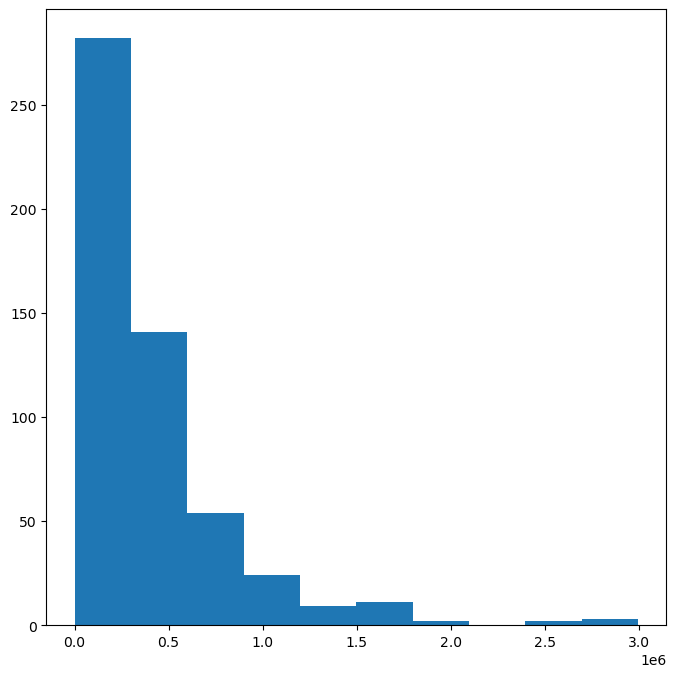

In [99]:
plt.figure(figsize=(8,8))
plt.hist(station_df['평균이용객수'])

In [172]:
housing=pd.read_csv('housing.csv',sep='\s+',header=None)

In [174]:
housing.columns=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']
housing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [178]:
# 1.주택가격의 평균
housing['medv'].mean()

22.532806324110677

In [179]:
# 2. 주택가격의 중앙값
housing['medv'].median()

21.2

In [180]:
# 3. 주택 가격의 표준편차
housing['medv'].std()

9.19710408737982

In [181]:
# 4. 주택가격의 최대값
housing['medv'].max()

50.0

In [182]:
# 5. 주택가격의 최소값
housing['medv'].min()

5.0

In [185]:
# 6. 주택가격의 최빈값
housing['medv'].mode()

0    50.0
Name: medv, dtype: float64

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

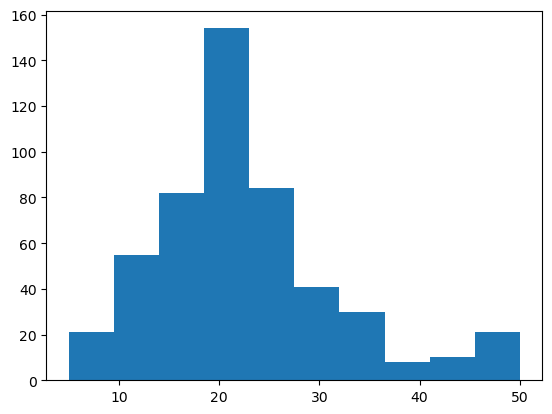

In [186]:
# 7. 주택가격의 분포 시각화
plt.hist(housing['medv'])